# Compare original data to streamed data


In [1]:
from open_ephys.analysis import Session
import numpy as np
import matplotlib.pylab as plt
from pathlib import Path
import json
import scipy

## Find recorded and original files
Please change these two variables if needed!

In [2]:

streamed_path = Path('~/PycharmProjects/zmq_debug/zmq_data/').expanduser()
original_data_path = Path('~/PycharmProjects/zmq_debug/data/').expanduser()

In [3]:
assert streamed_path.exists(), f'Please change streamed_path from {streamed_path}'
assert original_data_path.exists(), f'change original data path from {original_data_path}'

streamed_files = list(streamed_path.glob('*.json'))
print(f'Found streamed files {[streamed_file.name for streamed_file in streamed_files]}')

Found streamed files ['2022-10-20_11-45-33`collect_first`_stress_test_minimal_missed.json', '2022-10-20_11-45-33`stream_first`_stress_test_minimal.json', '2022-10-20_11-45-33`collect_first`_stress_test_minimal.json', '2022-10-20_11-45-33`stream_first`_stress_test_minimal_missed.json']


In [4]:
def plot_channel_length_histogram(stream_data):
    n_samples=np.array([len(ch_data) for i,ch_data in stream_data.items()])
    plt.hist(n_samples)
    mode=int(scipy.stats.mode(n_samples, keepdims=False).mode)
    plt.title('Distribution of numbers of samples in channels')
    plt.xlabel('Number of samples')
    plt.ylabel('Count of channels')
    print(f'Channels {np.where(n_samples[n_samples!=mode])} have fewer or more samples than {mode}')
    plt.show()


In [12]:
def plot_data_integrity(rec, stream_data):
    from scipy import signal
    # plt.rcParams["figure.figsize"] = (25,6)
    for channel in range(10):
        original = rec.continuous[0].samples[:, channel] * bit_volts
        streamed = stream_data[str(channel)]#[:5000]
        print(f'Streamed contains {len(streamed)} samples, original {len(original)}')

        correlation = signal.correlate(original - np.mean(original), streamed - np.mean(streamed), mode="full")
        lags = signal.correlation_lags(len(original), len(streamed), mode="full")
        lag = lags[np.argmax(abs(correlation))]

        offset = abs(lag)
        offset_original = original[offset:]

        print(f'Stream starts at {offset}_th sample')
        if sum(offset_original[:3000] - streamed[:3000])>0.01:
            print(f'Channel {channel} mismatch by {sum(offset_original[:3000] - streamed[:3000])}')

        plt.plot(streamed, lw=0.8)
        plt.plot(offset_original + 3, 'r', lw=.8)
        plt.title(f"channel {channel}")
        plt.show()


======= 2022-10-20_11-45-33 stream_first _stress_test_minimal.json ========
Loading /Users/canaery/PycharmProjects/zmq_debug/zmq_data/2022-10-20_11-45-33`stream_first`_stress_test_minimal.json
Channels (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),) have fewer or more samples than 12535


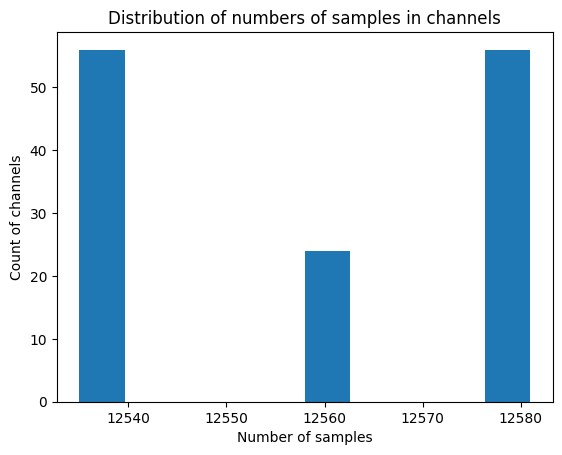

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample


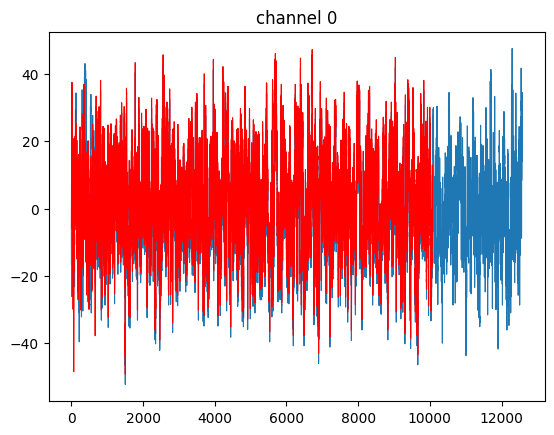

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 1 mismatch by 10266.164505720139


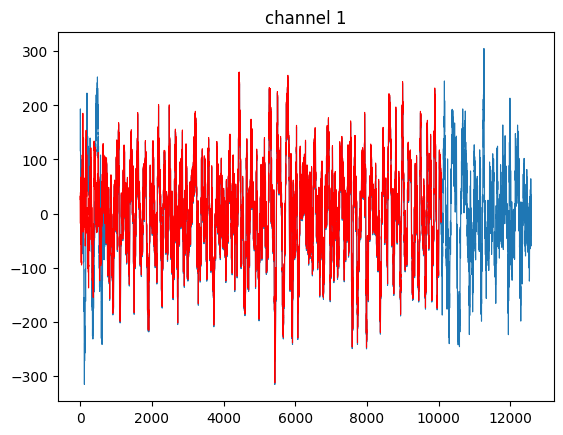

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 2 mismatch by 9264.839715361595


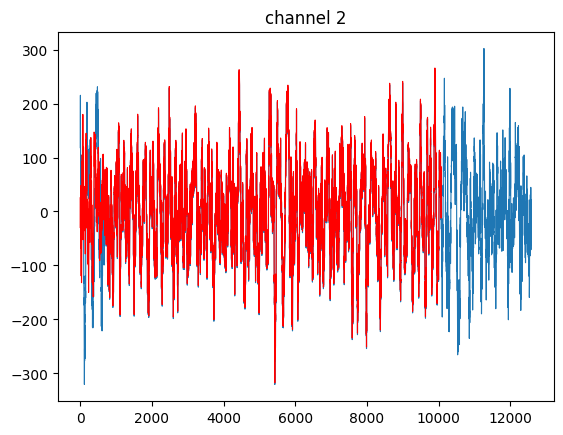

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 3 mismatch by 9810.449680387974


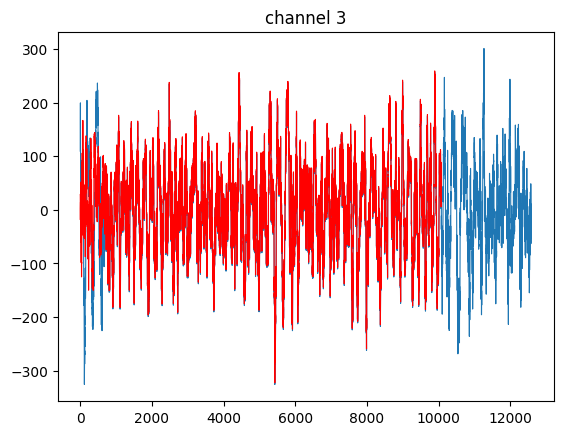

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 4 mismatch by 10324.859629690647


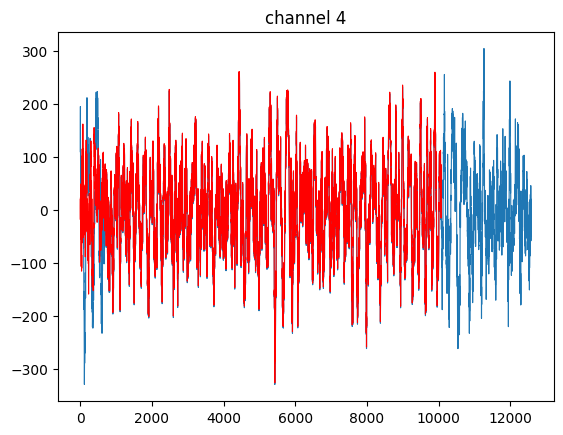

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 5 mismatch by 10495.679661929607


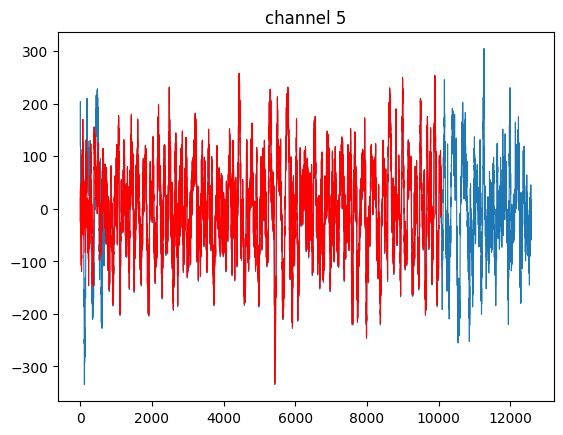

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 6 mismatch by 11321.309616625309


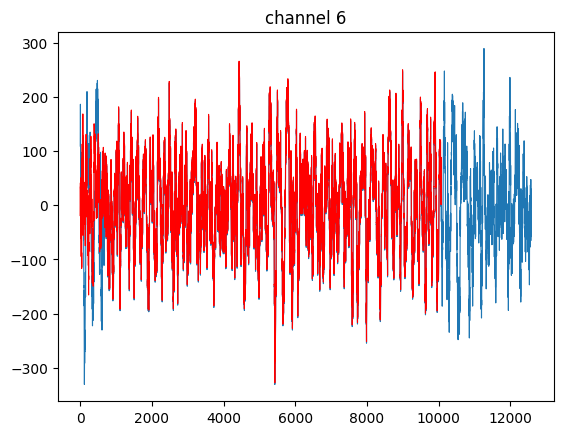

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 7 mismatch by 12672.464583575726


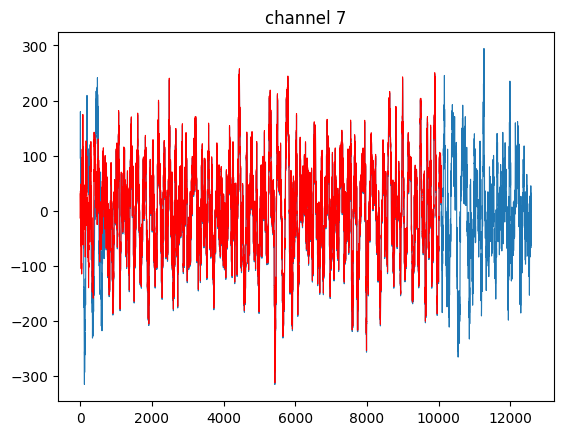

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 8 mismatch by 8977.409794449806


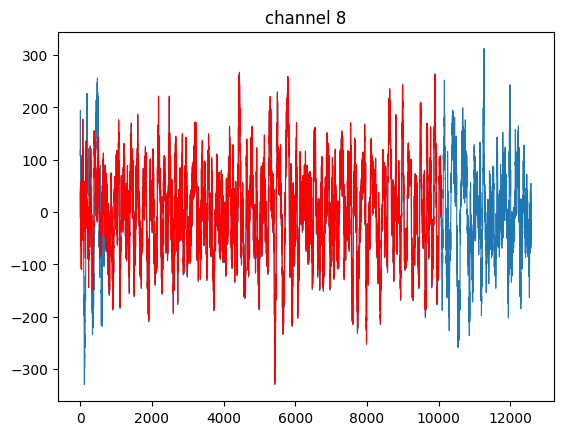

Streamed contains 12581 samples, original 12558
Stream starts at 2484_th sample
Channel 9 mismatch by 11180.129563570023


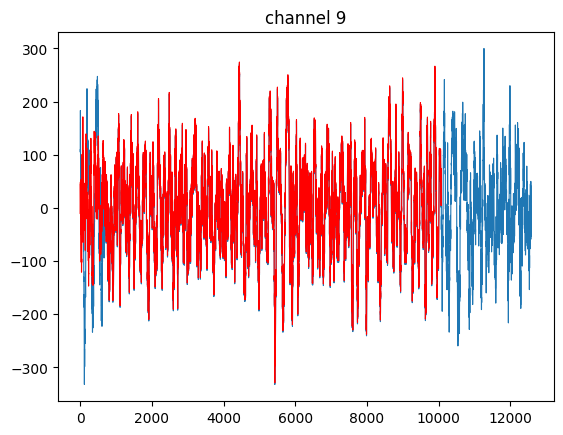

======= 2022-10-20_11-45-33 collect_first _stress_test_minimal.json ========
Loading /Users/canaery/PycharmProjects/zmq_debug/zmq_data/2022-10-20_11-45-33`collect_first`_stress_test_minimal.json
Channels (array([], dtype=int64),) have fewer or more samples than 12558


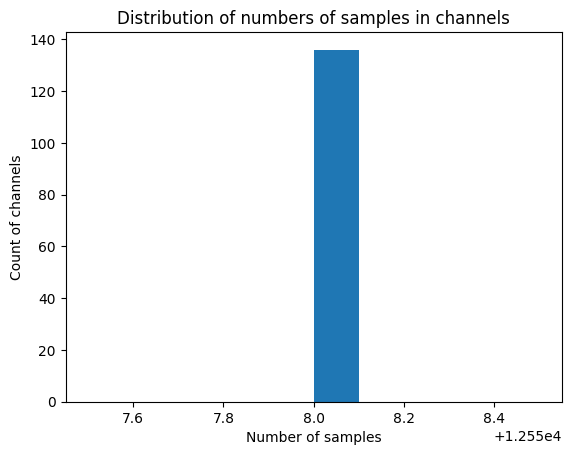

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


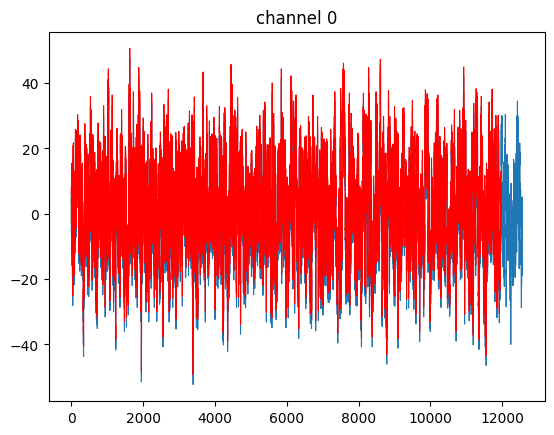

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


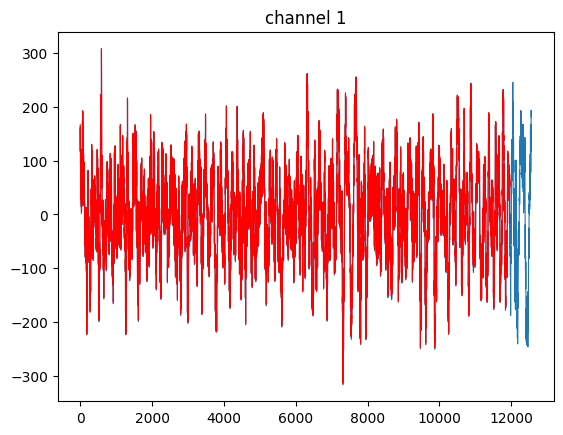

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


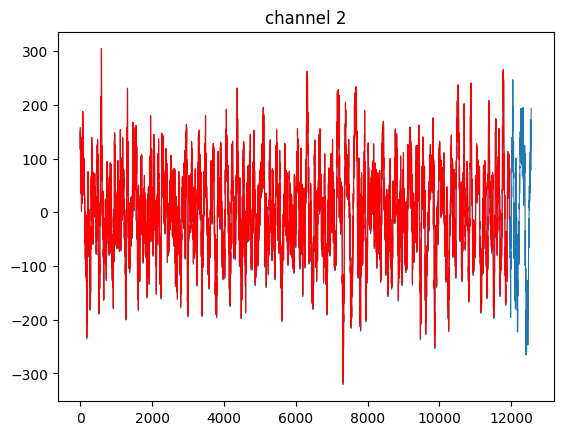

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


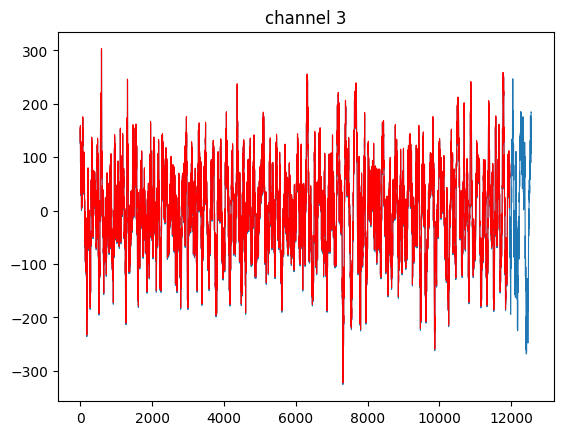

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


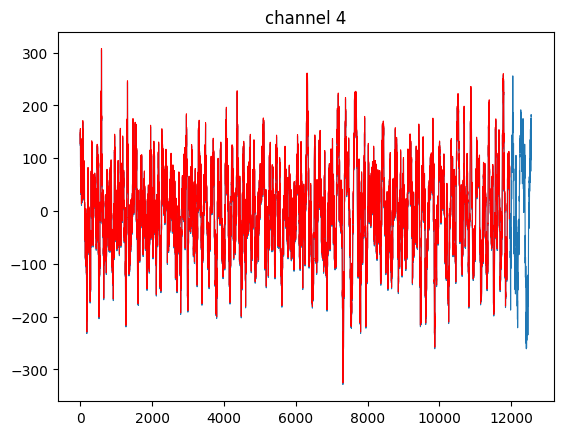

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


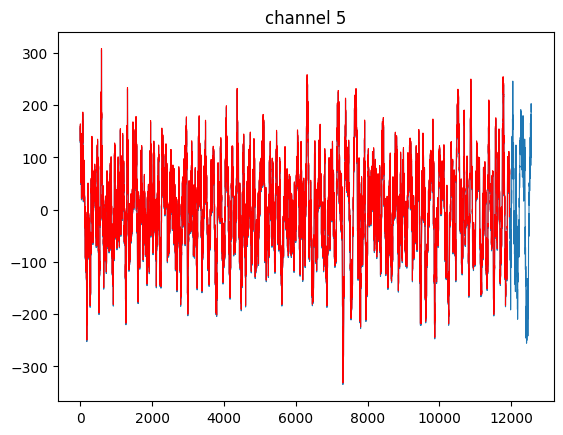

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


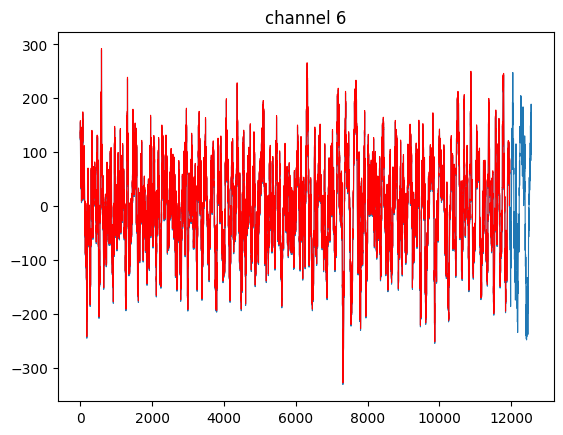

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


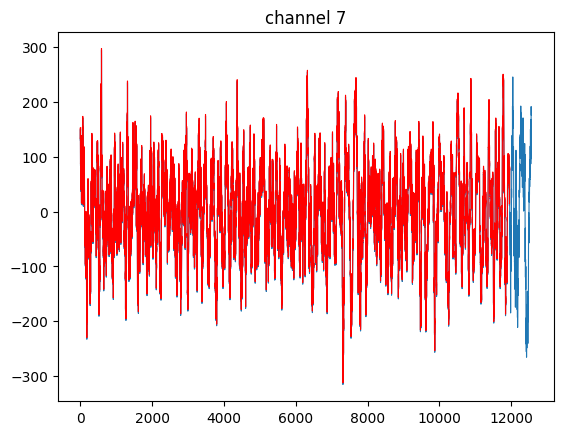

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


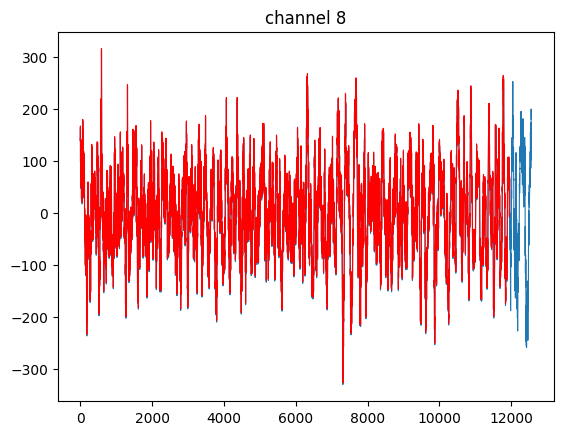

Streamed contains 12558 samples, original 12558
Stream starts at 598_th sample


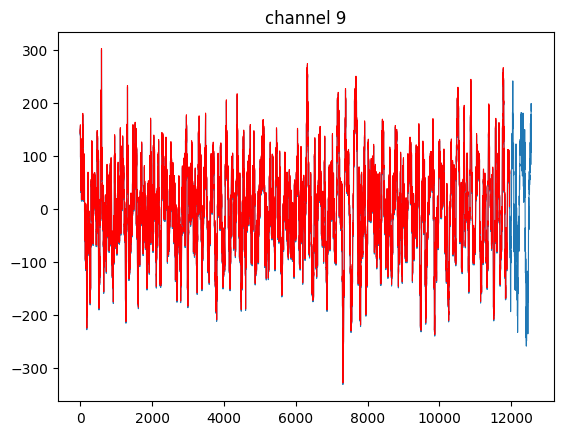

In [14]:
for streamed_file in streamed_files:
    if 'missed' in streamed_file.name:
        continue
    fname, condition1, condition2 = streamed_file.name.split('`')
    print(f'======= {fname} {condition1} {condition2} ========')
    with open(streamed_file, 'r') as f:
        print(f'Loading {streamed_file}')
        stream_data = json.loads(f.read())

    plot_channel_length_histogram(stream_data)
    original_recording_path = original_data_path / fname
    if not original_data_path.exists():
        raise FileNotFoundError(f'Original recording {fname} not found'
                                f' in {original_data_path}: {original_recording_path} ')

    session = Session(original_recording_path)
    rec = session.recordnodes[0].recordings[0]
    bit_volts = rec.info['continuous'][0]['channels'][0]['bit_volts']
    # session.recordnodes[0].recordings[0].continuous
    plot_data_integrity(rec,stream_data)
